
# Machine Learning Algorithms Demystified (Beginner-Friendly)

**Goal:** Understand and *see* how three common ML algorithms work — using a simple sales dataset and very clear visuals.

**You will learn:**
- What machine learning is (in plain English)
- How to load and explore a dataset
- How to visualize relationships
- How to split data into train/test
- How to train **Linear Regression**, **Decision Tree**, and **KNN**
- How to evaluate and compare models
- A fun **what-if** prediction demo

Done by: Veronica (Datageekismyname) Follow me on YouTube: https://www.youtube.com/@datageekismyname


## Step 1 — Imports (our toolbox)

In [1]:

# If you are missing any of these, install with:
# pip install pandas numpy matplotlib seaborn scikit-learn

import pandas as pd              # tables (like Excel)
import numpy as np               # math & arrays
import matplotlib.pyplot as plt  # charts
plt.rcParams['figure.figsize'] = (7, 5)

# Prettier charts with seaborn (optional)
try:
    import seaborn as sns
    sns.set_theme(style="ticks")
    HAS_SEABORN = True
except Exception:
    HAS_SEABORN = False

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, r2_score


## Step 2 — Load and peek at the data

In [2]:

csv_path = "Sales_Prediction_ML.csv"  # Place this file in the same folder as the notebook
df = pd.read_csv(csv_path)

# printFirst 5 rows of the dataset to review
display(df.head())

print("\nColumn meanings:")
print("• Advertising Budget ($): money spent on ads")
print("• Product Price ($): price per unit")
print("• Website Visits: number of visitors")
print("• Sales: total sales (this is our target to predict)")

,Advertising Budget ($),Product Price ($),Website Visits,Sales
0,4370.86,67.78,4052,6630.13
1,9556.43,17.57,695,2672.77
2,7587.95,24.55,828,1658.28
3,6387.93,90.87,1465,2608.10
4,2404.17,64.58,4592,9611.36



Column meanings:
• Advertising Budget ($): money spent on ads
• Product Price ($): price per unit
• Website Visits: number of visitors
• Sales: total sales (this is our target to predict)



## Step 3 — Quick data health check

In [3]:
display(df.isna().sum())
display(df.describe())

Advertising Budget ($)    0
Product Price ($)         0
Website Visits            0
Sales                     0
dtype: int64

,Advertising Budget ($),Product Price ($),Website Visits,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,5356.056100,55.394100,2638.725000,5051.900100
std,2654.022939,26.370064,1424.729483,2921.309514
min,1049.700000,10.460000,109.000000,-778.970000
25%,3057.240000,33.532500,1407.000000,2547.570000
50%,5450.375000,58.750000,2748.500000,4982.900000
75%,7811.737500,76.797500,3811.500000,7418.012500
max,9881.980000,99.150000,4959.000000,10516.910000



## Step 4 — Visualize relationships (pictures help!)

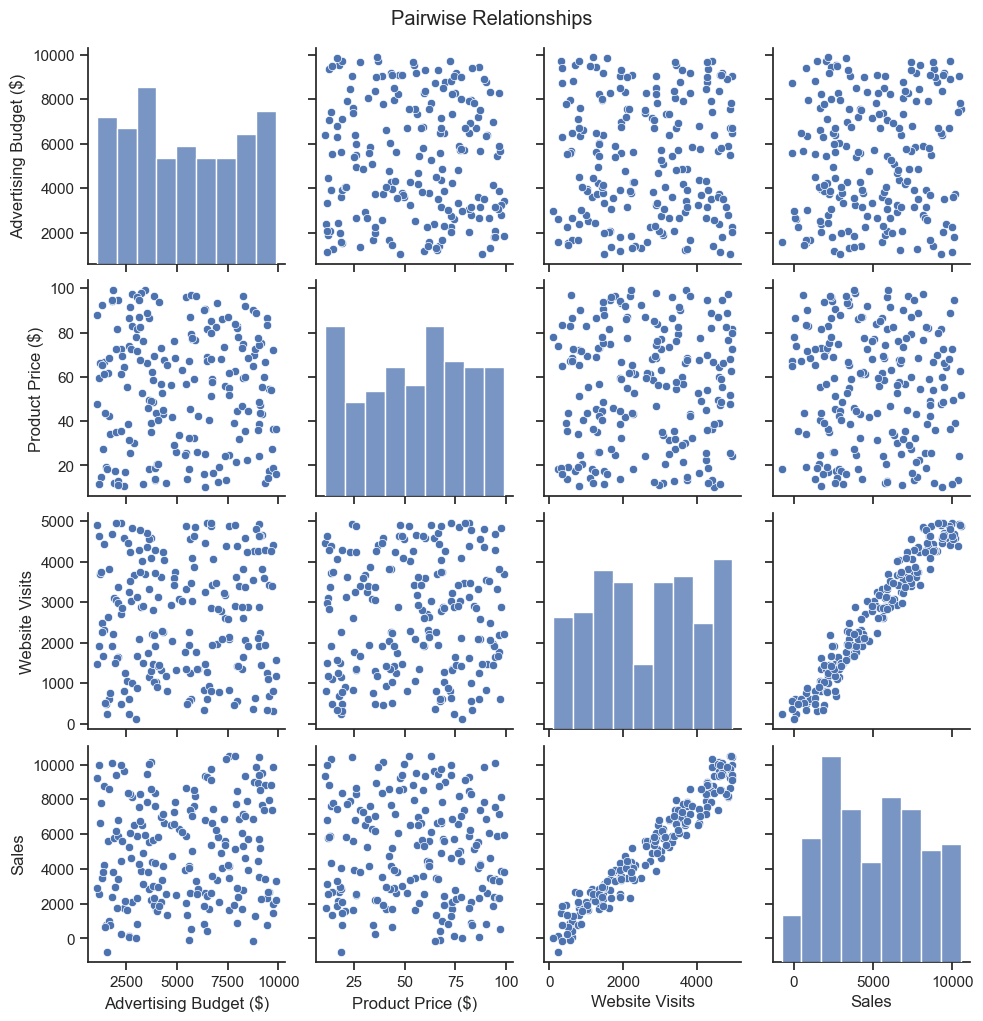

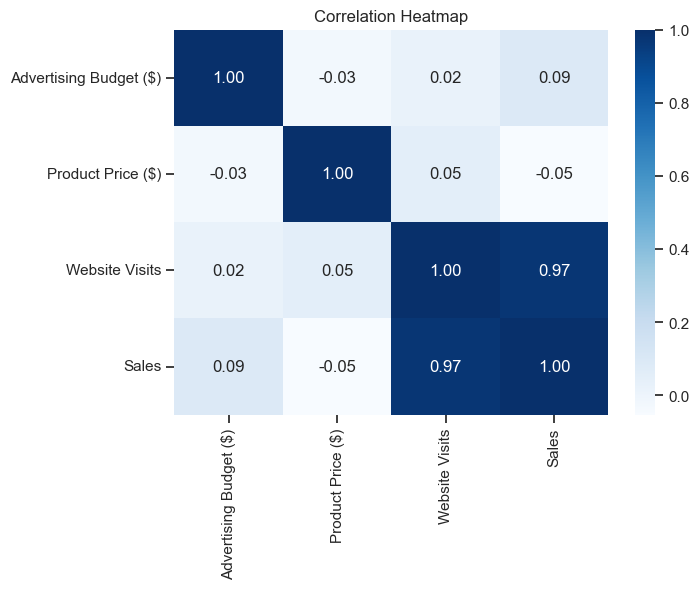

In [4]:

if 'Sales' in df.columns:
    if 'Advertising Budget ($)' in df.columns and 'Website Visits' in df.columns:
        if 'Product Price ($)' in df.columns:
            if 'Sales' in df.columns:
                pass

if 'Sales' not in df.columns:
    raise ValueError("The dataset is missing the 'Sales' column.")

if HAS_SEABORN:
    sns.pairplot(df, diag_kind="hist")
    plt.suptitle("Pairwise Relationships", y=1.02)
    plt.show()

    corr = df.corr(numeric_only=True)
    sns.heatmap(corr, annot=True, cmap="Blues", fmt=".2f")
    plt.title("Correlation Heatmap")
    plt.show()
else:
    # Fallback: One useful scatter if seaborn isn't available
    plt.scatter(df["Advertising Budget ($)"], df["Sales"], alpha=0.6)
    plt.title("Advertising Budget vs Sales")
    plt.xlabel("Advertising Budget ($)")
    plt.ylabel("Sales")
    plt.show()


## Step 5 — Choose features (X) and the target (y)

In [5]:

feature_cols = ["Advertising Budget ($)", "Product Price ($)", "Website Visits"]
X = df[feature_cols]
y = df["Sales"]

X.head(), y.head()

(   Advertising Budget ($)  Product Price ($)  Website Visits
 0                 4370.86              67.78            4052
 1                 9556.43              17.57             695
 2                 7587.95              24.55             828
 3                 6387.93              90.87            1465
 4                 2404.17              64.58            4592,
 0    6630.13
 1    2672.77
 2    1658.28
 3    2608.10
 4    9611.36
 Name: Sales, dtype: float64)


## Step 6 — Split into Train and Test

In [6]:

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42
)
print(f"Training rows: {len(X_train)} | Testing rows: {len(X_test)}")

Training rows: 150 | Testing rows: 50



## Step 7 — Train 3 models (Linear Regression, Decision Tree, KNN)
> • **Linear Regression:** draws the best straight line to predict numbers.  
> • **Decision Tree:** asks yes/no questions like a flowchart.  
> • **KNN:** looks at the closest examples and averages them.


In [11]:
lin_reg = LinearRegression().fit(X_train, y_train)
tree = DecisionTreeRegressor(random_state=42, max_depth=5).fit(X_train, y_train)
knn = KNeighborsRegressor(n_neighbors=5).fit(X_train, y_train)

print("✅ Models trained!")

✅ Models trained!



## Step 8 — Predict and evaluate
In this step: We score each model using MAE (average error) and R² (how much variation it explains). Lower MAE is better; R² closer to 1 is better.


In [8]:

models = {
    "Linear Regression": lin_reg,
    "Decision Tree": tree,
    "KNN (k=5)": knn
}

rows = []
for name, model in models.items():
    preds = model.predict(X_test)
    mae = mean_absolute_error(y_test, preds)
    r2 = r2_score(y_test, preds)
    rows.append((name, mae, r2))

score_df = pd.DataFrame(rows, columns=["Model", "MAE (lower is better)", "R2 (closer to 1 is better)"])
score_df.sort_values("MAE (lower is better)", inplace=True)
display(score_df.style.background_gradient(cmap="Greens"))

,Model,MAE (lower is better),R2 (closer to 1 is better)
0,Linear Regression,464.827275,0.957174
2,KNN (k=5),615.471000,0.934189
1,Decision Tree,735.527855,0.910480



## Step 9 — Visualize Actual vs Predicted
If points hug the dashed line, predictions are close to the truth.


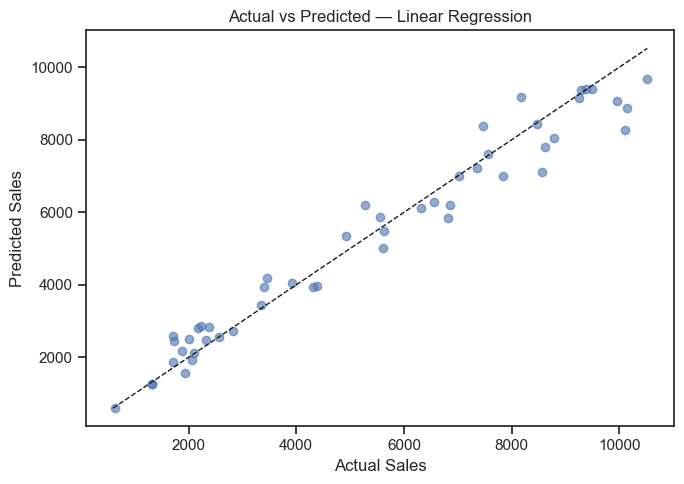

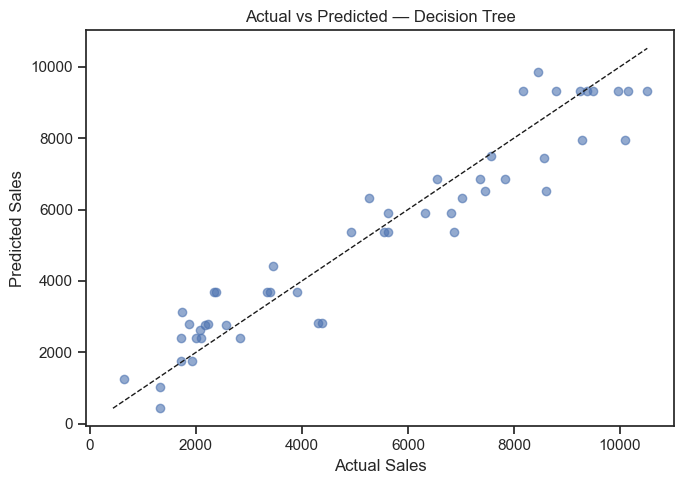

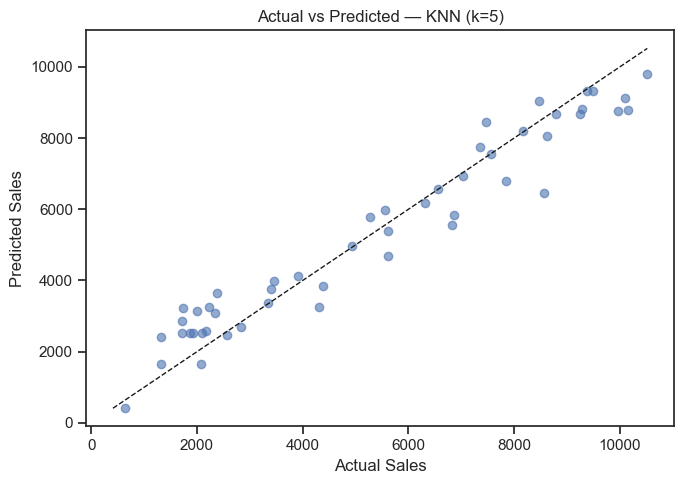

In [9]:

def plot_actual_vs_predicted(model, name):
    preds = model.predict(X_test)
    plt.figure()
    plt.scatter(y_test, preds, alpha=0.6)
    lims = [min(y_test.min(), preds.min()), max(y_test.max(), preds.max())]
    plt.plot(lims, lims, 'k--', linewidth=1)
    plt.title(f"Actual vs Predicted — {name}")
    plt.xlabel("Actual Sales")
    plt.ylabel("Predicted Sales")
    plt.tight_layout()
    plt.show()

for n, m in models.items():
    plot_actual_vs_predicted(m, n)


## Step 10 — What‑If Prediction (have fun!)

In [10]:
example = pd.DataFrame({
    "Advertising Budget ($)": [5000],
    "Product Price ($)": [40],
    "Website Visits": [2000]
})
print("Scenario:", example.to_dict(orient="records")[0])
for name, model in models.items():
    print(f"{name:>18} predicts Sales ≈ {model.predict(example)[0]:.2f}")

Scenario: {'Advertising Budget ($)': 5000, 'Product Price ($)': 40, 'Website Visits': 2000}
 Linear Regression predicts Sales ≈ 3914.30
     Decision Tree predicts Sales ≈ 4408.59
         KNN (k=5) predicts Sales ≈ 3867.88


Thank you for you support
Veronica aka "DataGeekismyname".